# Griffin Benchmark Analysis
This notebook presents results in a style inspired by the Griffin paper, focusing on grouped bar charts, clear scenario separation, and concise context for each benchmark and model.

# Griffin Benchmark Analysis
This notebook visualizes the results of both scenarios for MQAR and Chomsky benchmarks. Each benchmark is shown as a single figure with two subplots side by side: Scenario 1 and Scenario 2.

In [23]:
import json
import matplotlib.pyplot as plt
import numpy as np
results = None
try:
    with open('../Griffin_pw/results/quick_experiment.json', 'r') as f:
        results = json.load(f)
except FileNotFoundError:
    try:
        with open('../../results/quick_experiment.json', 'r') as f:
            results = json.load(f)
    except FileNotFoundError:
        with open('../results/quick_experiment.json', 'r') as f:
            results = json.load(f)
if results is None:
    raise FileNotFoundError('quick_experiment.json not found in any known location.')

## MQAR Loss Comparison
Each subplot shows the final loss for Griffin, Hawk, and Local Attention in Scenario 1 and Scenario 2.

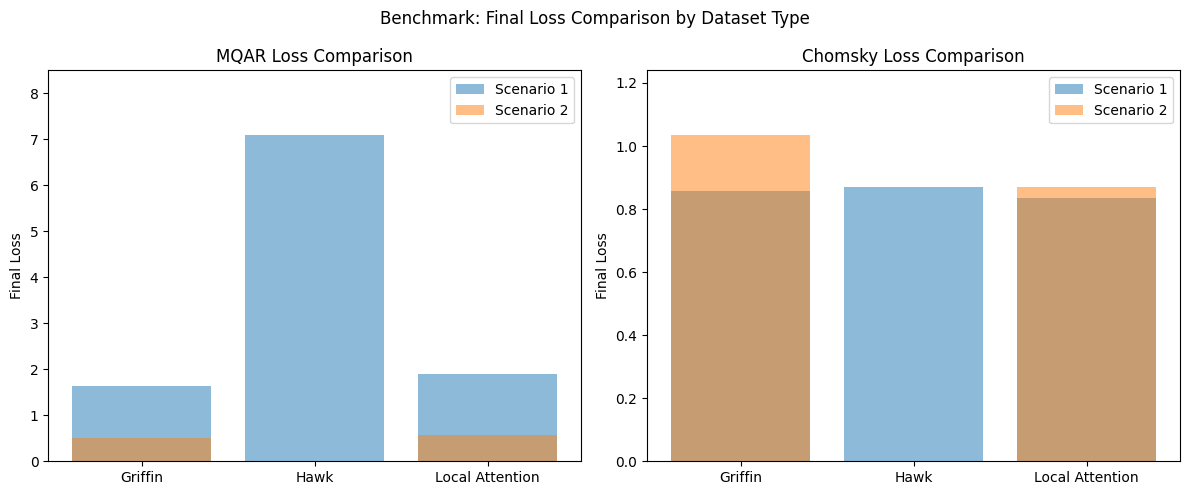

In [24]:
# MQAR: subplot for each dataset type (Scenario 1 vs Scenario 2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
dataset_types = ['MQAR', 'Chomsky']
scenarios = ['scenario_1', 'scenario_2']
for i, dataset in enumerate(dataset_types):
    for j, scenario in enumerate(scenarios):
        data = results[scenario][dataset]
        models = list(data.keys())
        losses = [data[m]['final_loss'] for m in models]
        axes[i].bar(models, losses, alpha=0.5, label=f'{scenario.replace('_', ' ').title()}')
    axes[i].set_title(f'{dataset} Loss Comparison')
    axes[i].set_ylabel('Final Loss')
    axes[i].set_ylim(0, max([results[s][dataset][m]['final_loss'] for s in scenarios for m in results[s][dataset]])*1.2)
    axes[i].legend()
plt.suptitle('Benchmark: Final Loss Comparison by Dataset Type')
plt.tight_layout()
plt.show()

## Chomsky Loss Comparison
Each subplot shows the final loss for Griffin, Hawk, and Local Attention in Scenario 1 and Scenario 2.

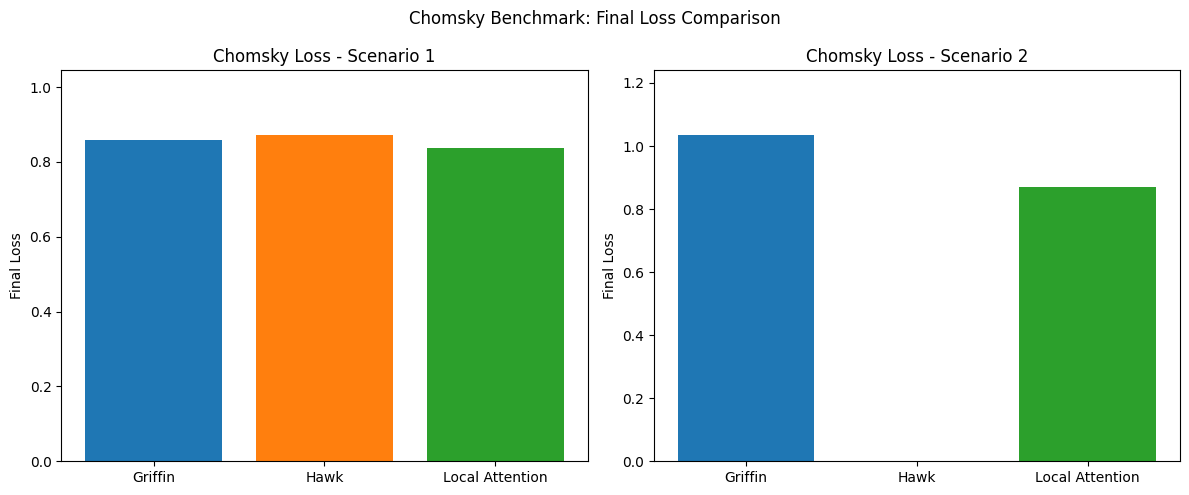

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, scenario in enumerate(scenarios):
    chomsky = results[scenario]['Chomsky']
    models = list(chomsky.keys())
    losses = [chomsky[m]['final_loss'] for m in models]
    axes[i].bar(models, losses, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    axes[i].set_title(f'Chomsky Loss - {scenario.replace('_', ' ').title()}')
    axes[i].set_ylabel('Final Loss')
    axes[i].set_ylim(0, max(losses)*1.2)
plt.suptitle('Chomsky Benchmark: Final Loss Comparison')
plt.tight_layout()
plt.show()

,Scenario,Benchmark,Model,Final_Loss,Latency,Throughput,CPU_Mem_MB,GPU_Mem_MB,Parameters,Seq_Len
0,scenario_1,MQAR,Griffin,1.632135,3.212068,2.490607,611.125000,0.0,3798144.0,NaN
1,scenario_1,MQAR,Hawk,7.078169,3.151057,2.538830,600.109375,0.0,2043360.0,NaN
2,scenario_1,MQAR,Local Attention,1.887409,0.425650,18.794802,576.382812,0.0,1667520.0,NaN
3,scenario_1,Chomsky,Griffin,0.858816,4.555254,1.756214,650.296875,0.0,3654288.0,NaN
4,scenario_1,Chomsky,Hawk,0.870459,3.907403,2.047396,615.468750,0.0,1899504.0,NaN
5,scenario_1,Chomsky,Local Attention,0.836477,0.349091,22.916649,646.535156,0.0,1523664.0,NaN
6,scenario_1,long_sequence_generalization,Griffin,7.041427,NaN,NaN,NaN,NaN,NaN,128.0
7,scenario_1,long_sequence_generalization,Griffin,7.039100,NaN,NaN,NaN,NaN,NaN,256.0
8,scenario_1,long_sequence_generalization,Griffin,7.042831,NaN,NaN,NaN,NaN,NaN,512.0
9,scenario_1,long_sequence_generalization,Griffin,6.972692,NaN,NaN,NaN,NaN,NaN,1024.0


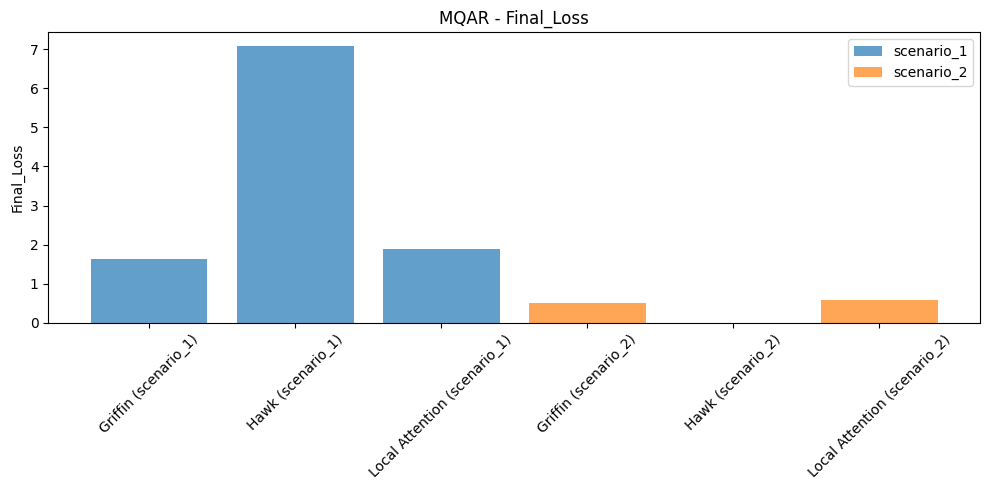

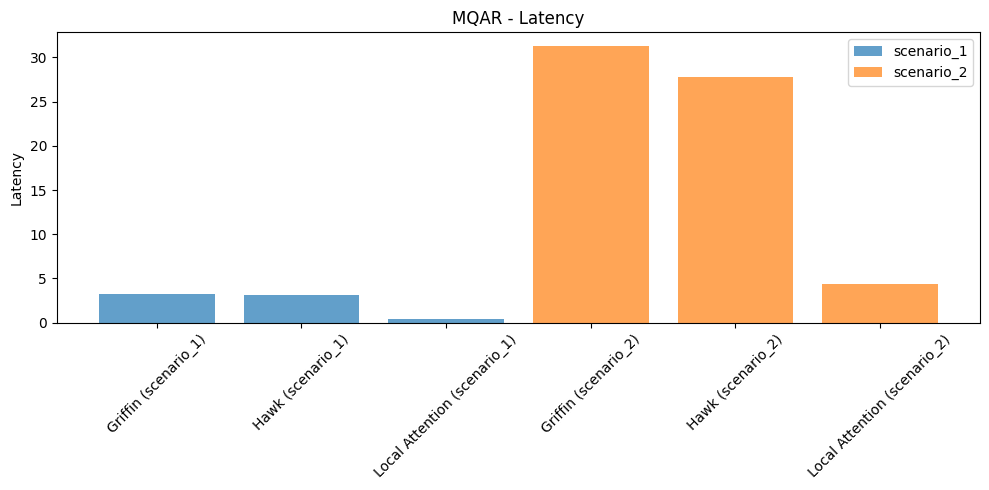

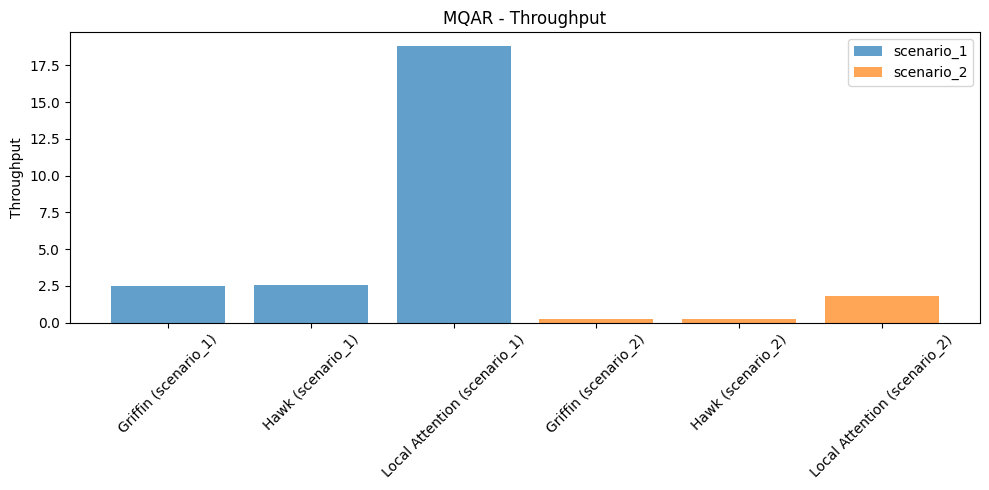

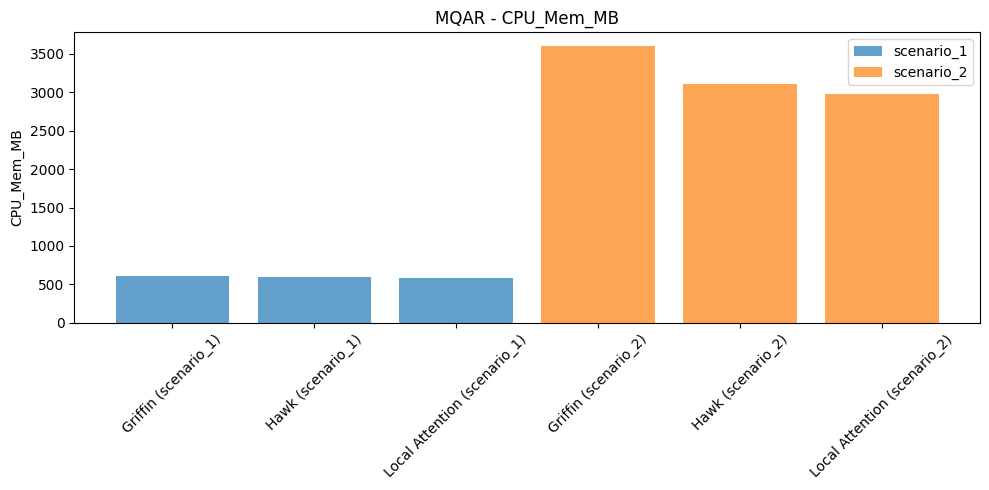

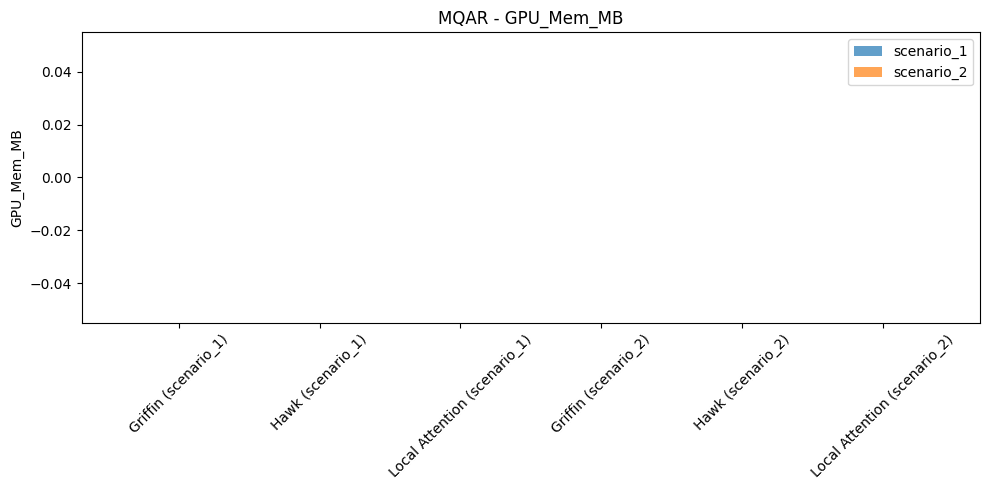

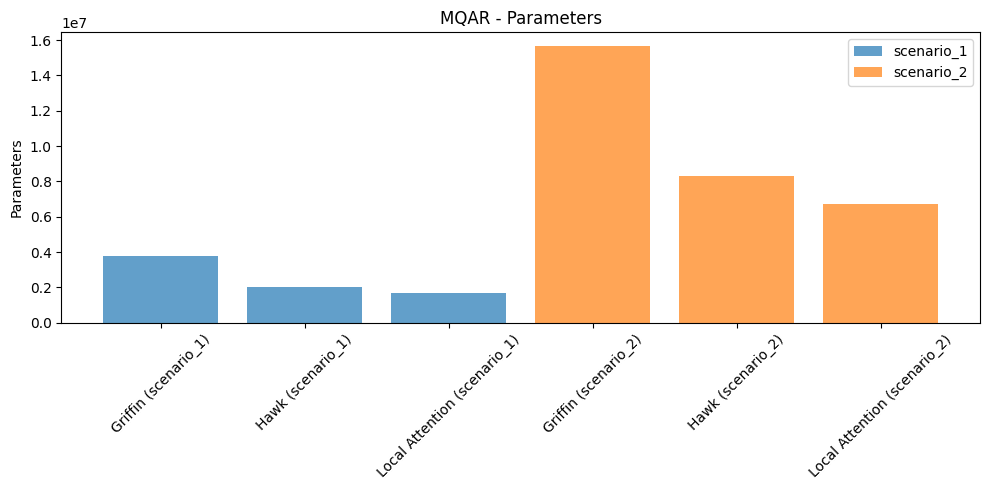

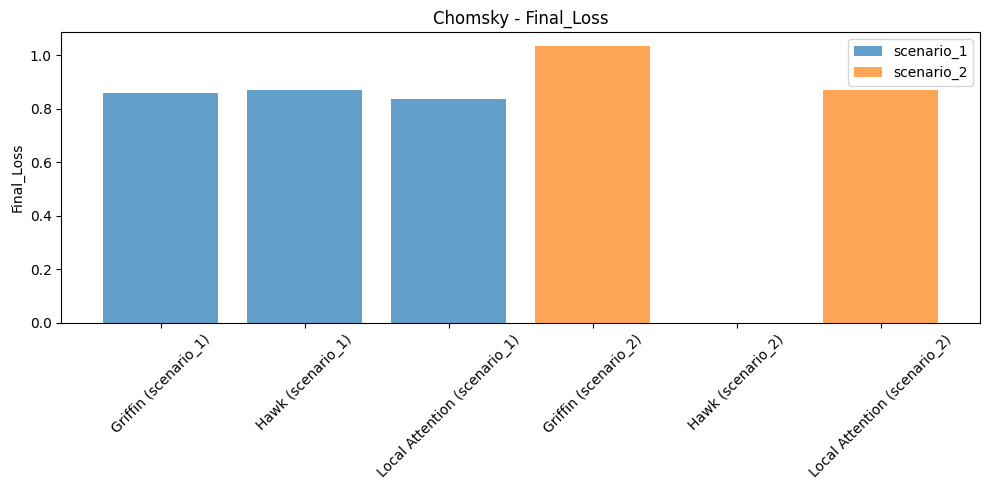

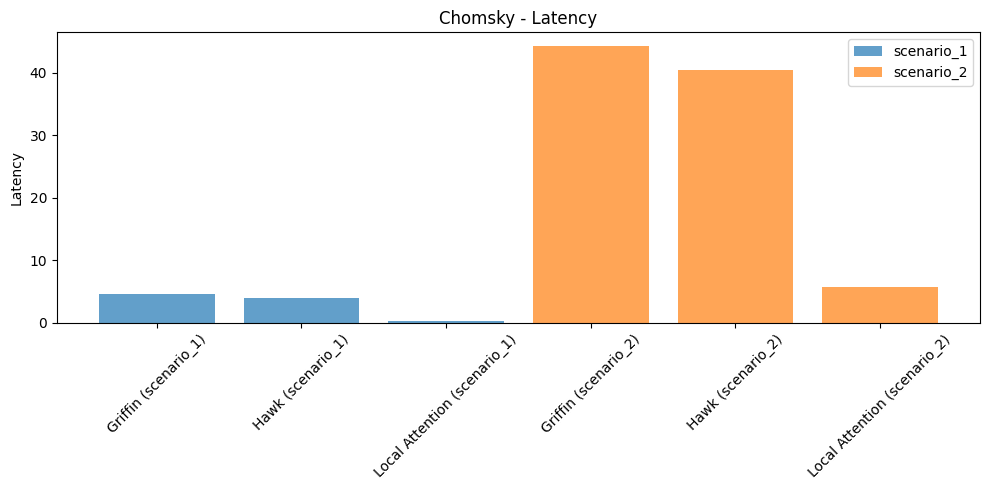

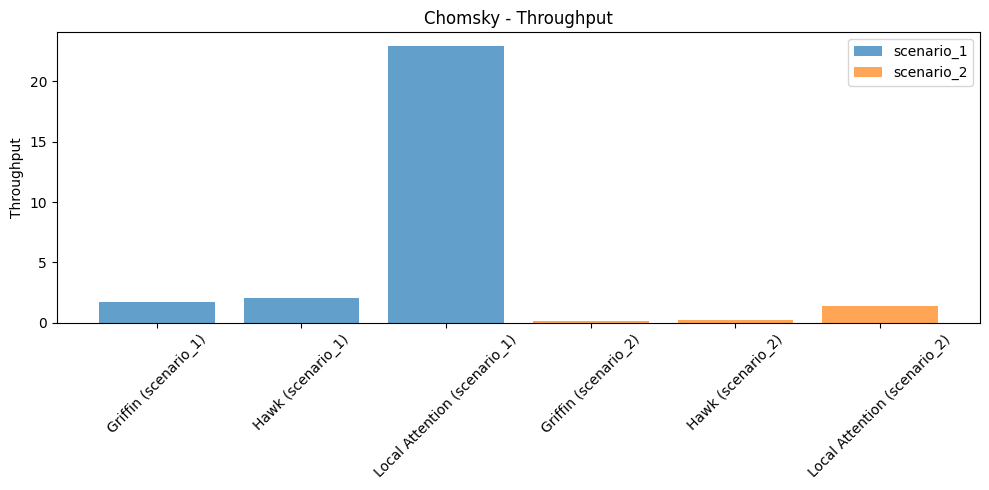

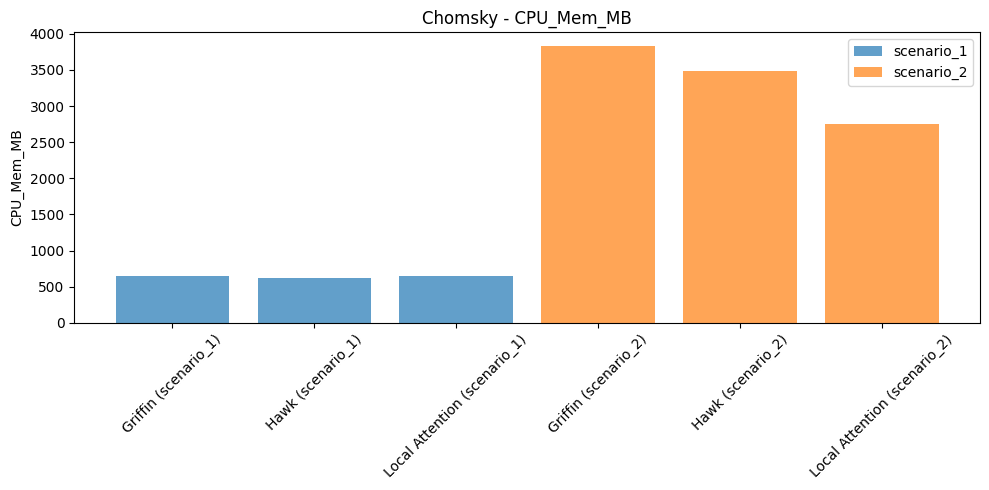

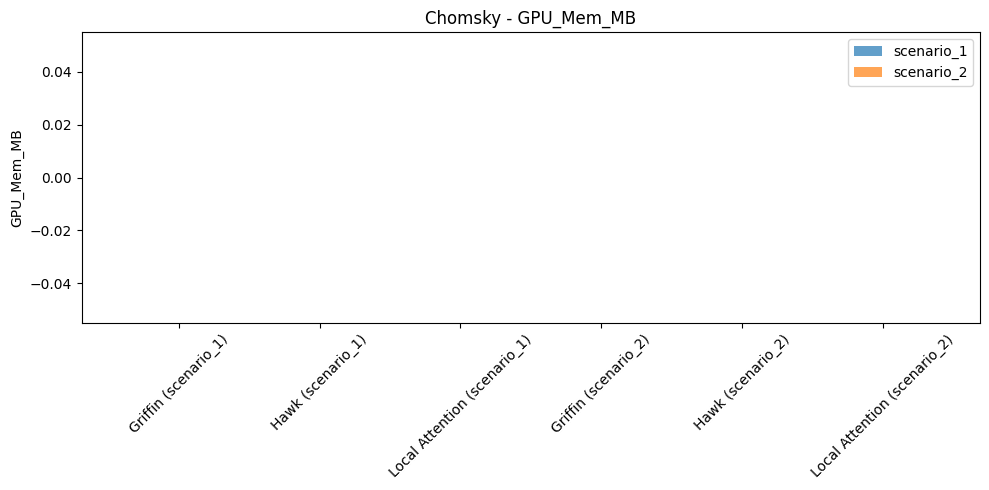

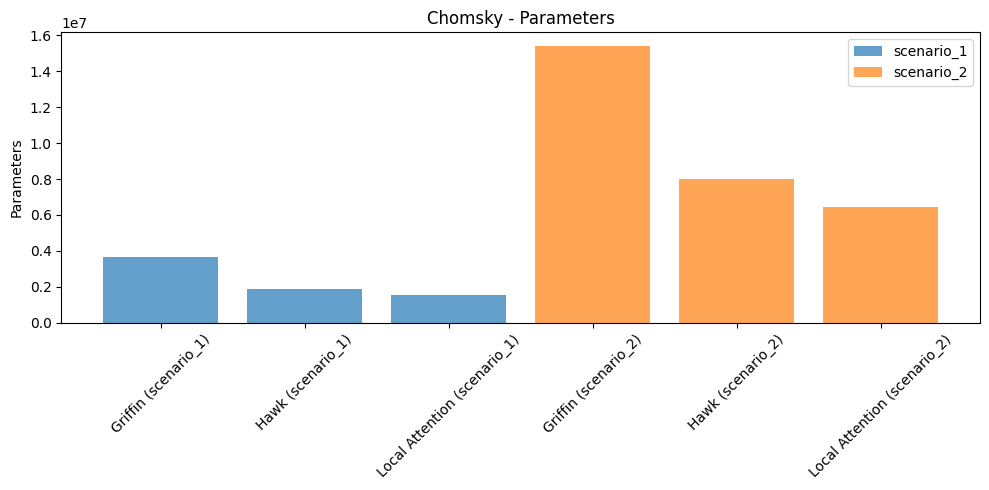

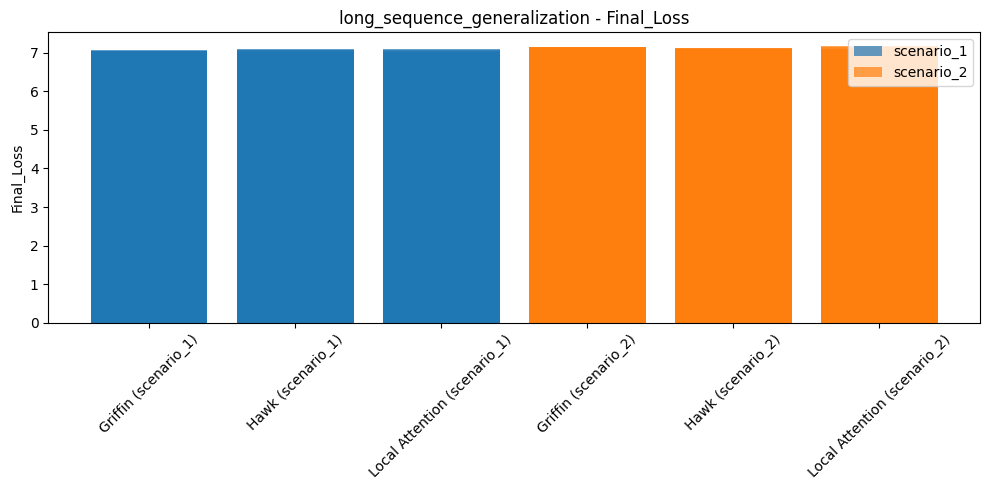

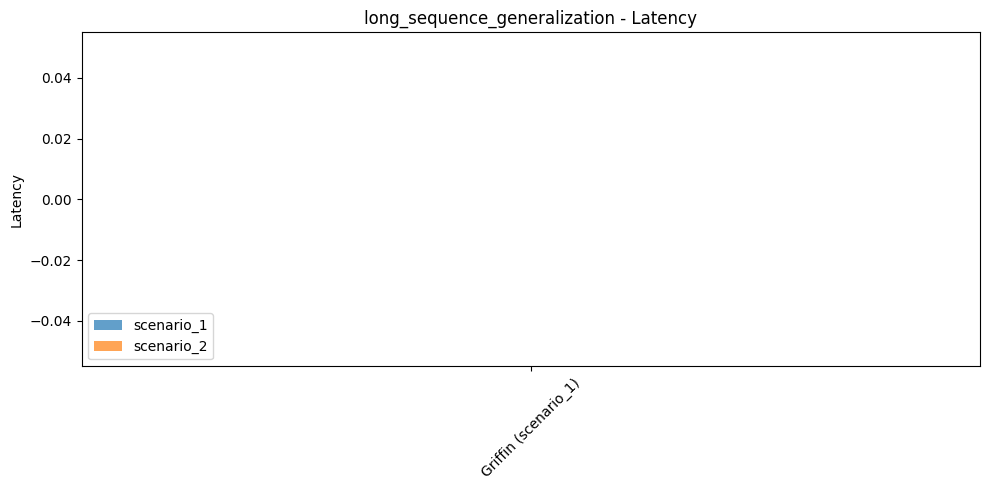

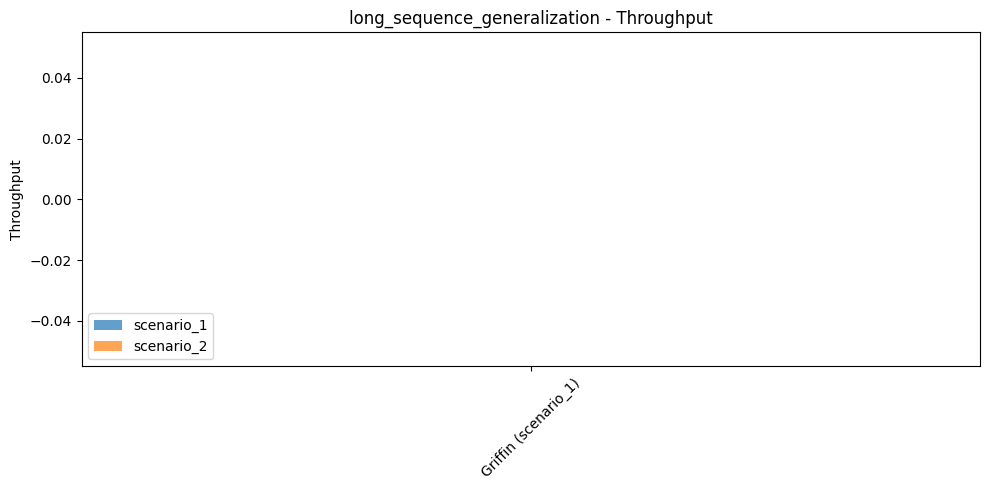

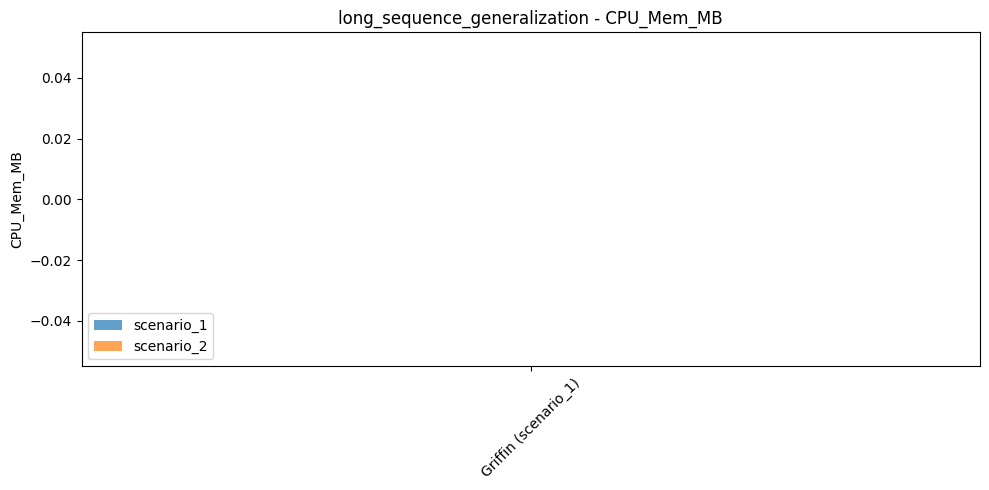

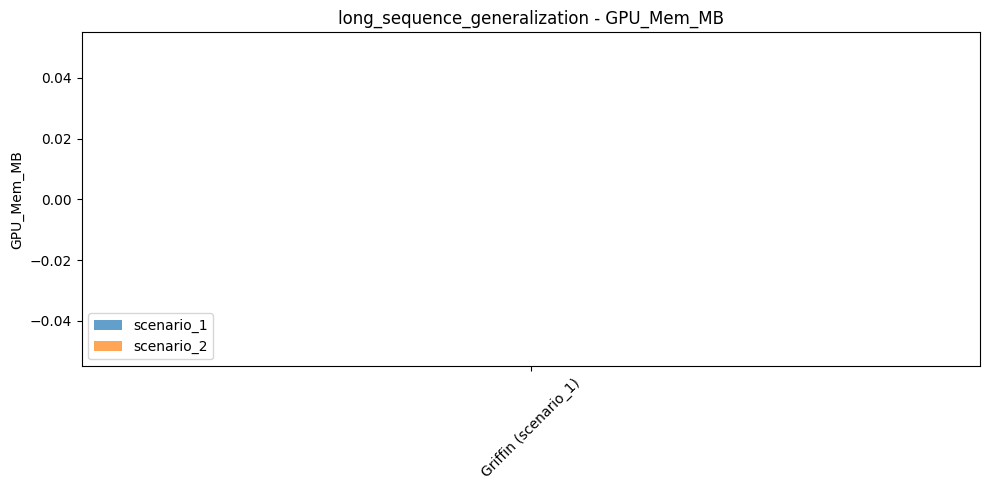

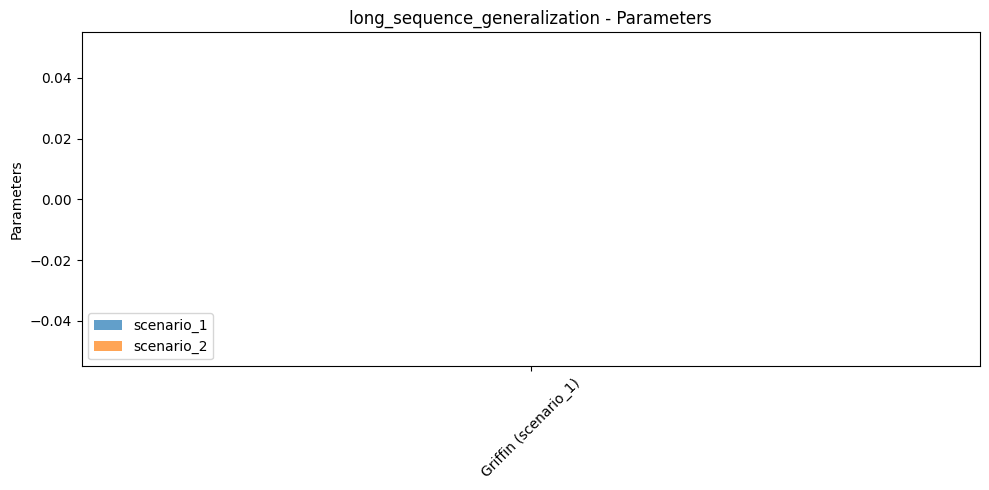

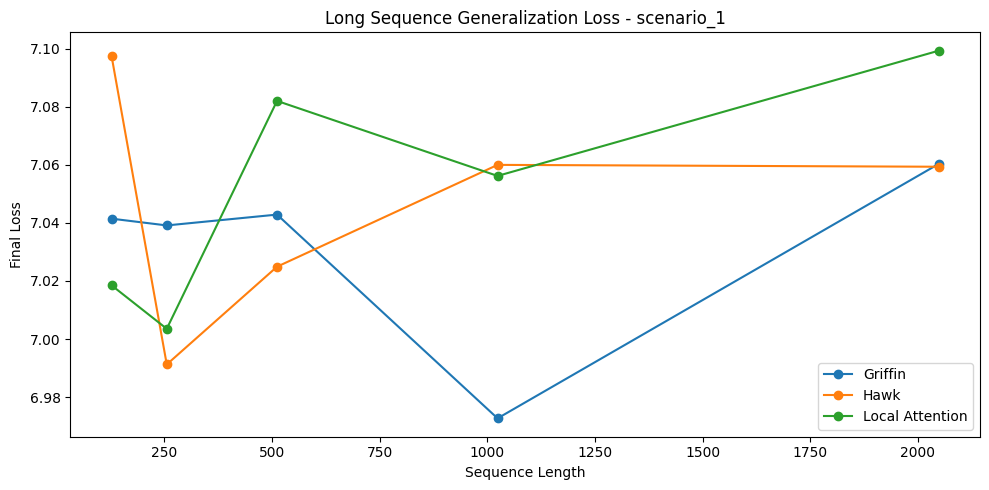

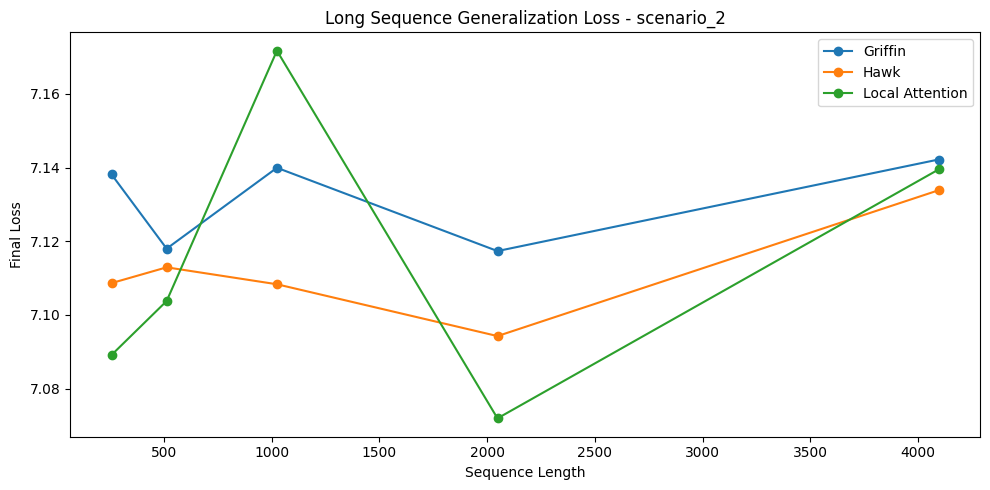

In [26]:
# Show all results from quick_experiment.json in tabular and graphical form
import pandas as pd
from IPython.display import display
def flatten_results(results):
    rows = []
    for scenario, scenario_data in results.items():
        for bench, bench_data in scenario_data.items():
            if bench == 'long_sequence_generalization':
                seq_lens = bench_data['sequence_lengths']
                for model in ['Griffin', 'Hawk', 'Local Attention']:
                    losses = bench_data[model]
                    for idx, seq_len in enumerate(seq_lens):
                        rows.append({
                            'Scenario': scenario,
                            'Benchmark': bench,
                            'Model': model,
                            'Seq_Len': seq_len,
                            'Final_Loss': losses[idx]
                        })
            else:
                for model, metrics in bench_data.items():
                    row = {
                        'Scenario': scenario,
                        'Benchmark': bench,
                        'Model': model,
                        'Final_Loss': metrics.get('final_loss'),
                        'Latency': metrics.get('latency_sec_per_step'),
                        'Throughput': metrics.get('throughput_samples_per_sec'),
                        'CPU_Mem_MB': metrics.get('cpu_mem_peak_mb'),
                        'GPU_Mem_MB': metrics.get('gpu_mem_peak_mb'),
                        'Parameters': metrics.get('parameters')
                    }
                    rows.append(row)
    return pd.DataFrame(rows)
df = flatten_results(results)
display(df)
# Plot all metrics for each benchmark/model/scenario
metrics = ['Final_Loss', 'Latency', 'Throughput', 'CPU_Mem_MB', 'GPU_Mem_MB', 'Parameters']
for bench in df['Benchmark'].unique():
    for metric in metrics:
        plt.figure(figsize=(10,5))
        subset = df[df['Benchmark'] == bench]
        for scenario in subset['Scenario'].unique():
            sub = subset[subset['Scenario'] == scenario]
            plt.bar(sub['Model'] + ' (' + scenario + ')', sub[metric], alpha=0.7, label=scenario)
        plt.title(f'{bench} - {metric}')
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
# For long_sequence_generalization, plot loss vs sequence length for each model/scenario
if 'long_sequence_generalization' in df['Benchmark'].values:
    for scenario in df['Scenario'].unique():
        subset = df[(df['Benchmark'] == 'long_sequence_generalization') & (df['Scenario'] == scenario)]
        plt.figure(figsize=(10,5))
        for model in subset['Model'].unique():
            sub = subset[subset['Model'] == model]
            plt.plot(sub['Seq_Len'], sub['Final_Loss'], marker='o', label=model)
        plt.title(f'Long Sequence Generalization Loss - {scenario}')
        plt.xlabel('Sequence Length')
        plt.ylabel('Final Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()

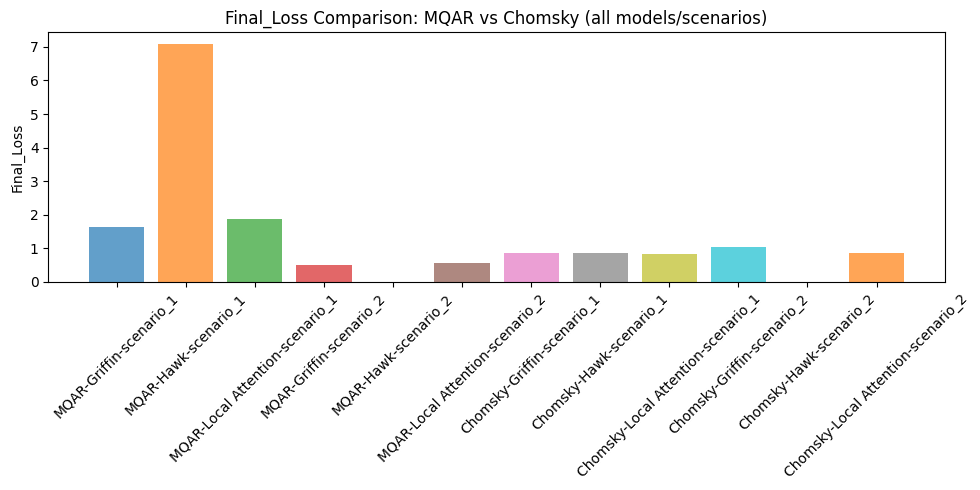

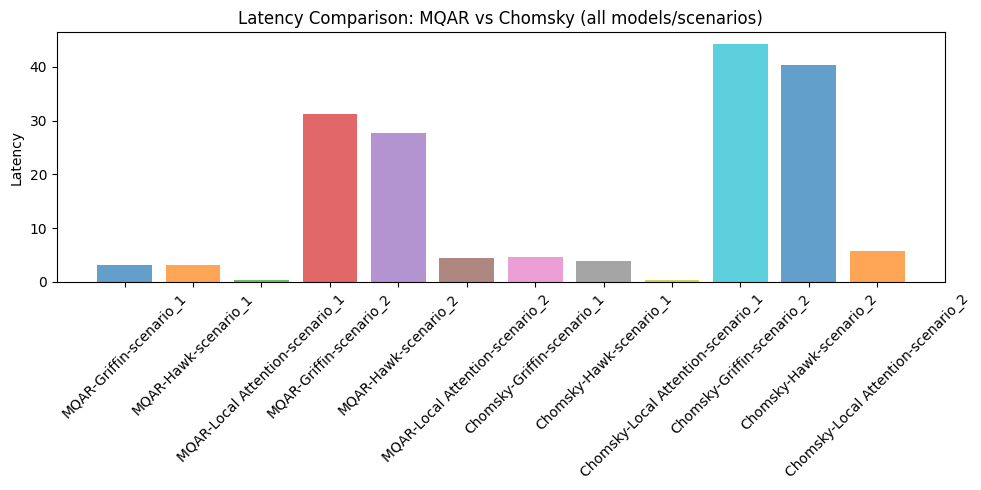

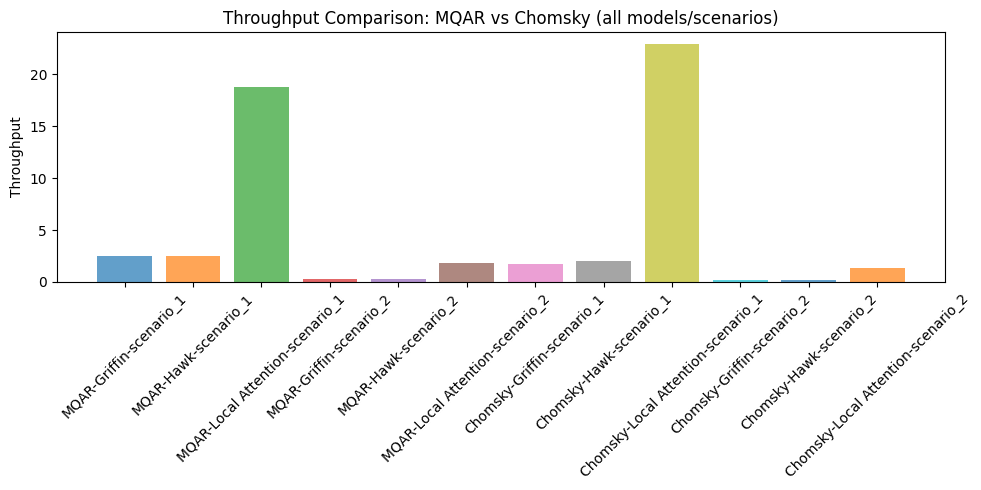

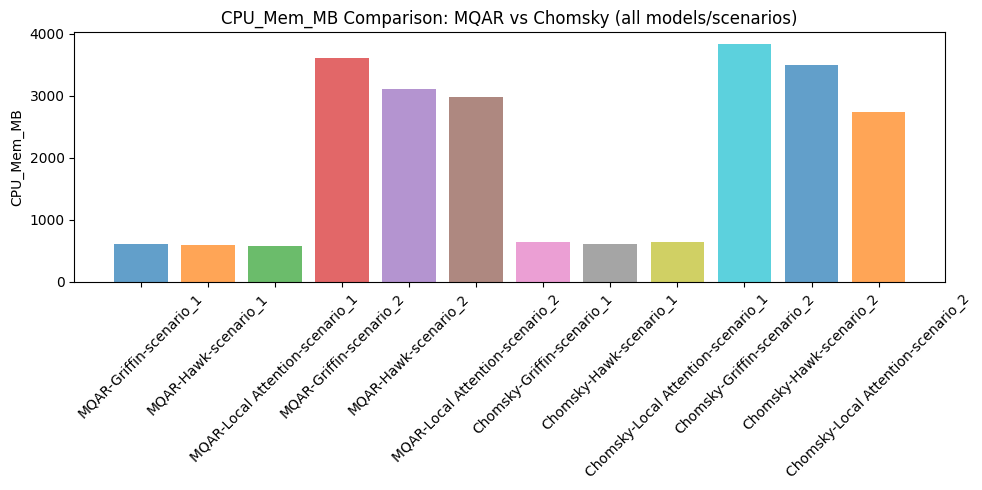

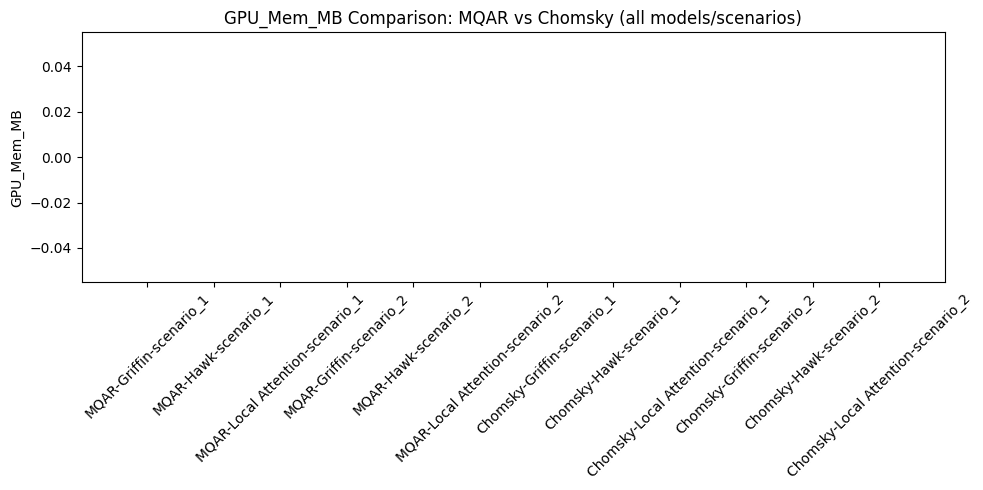

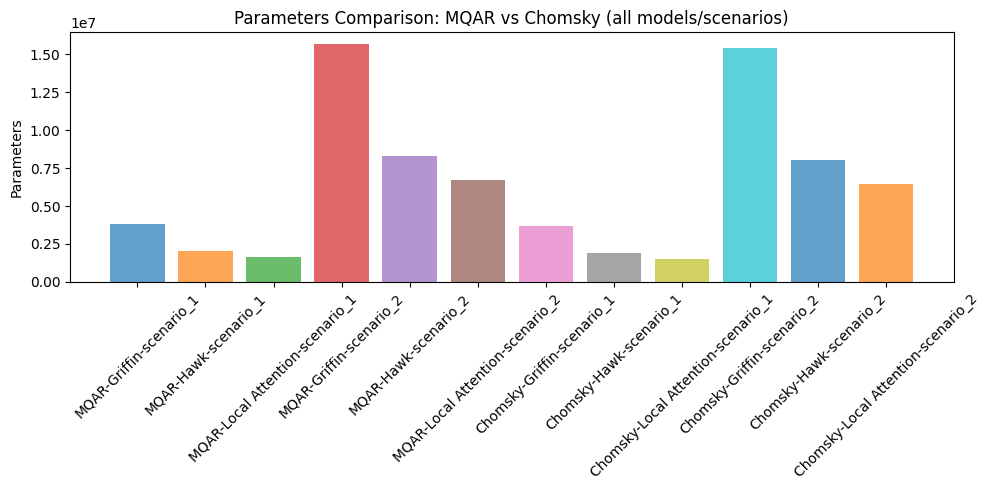

In [27]:
# Plot each metric with both datasets (MQAR vs Chomsky) in the same figure, grouped by scenario and model
metrics = ['Final_Loss', 'Latency', 'Throughput', 'CPU_Mem_MB', 'GPU_Mem_MB', 'Parameters']
benchmarks = ['MQAR', 'Chomsky']
for metric in metrics:
    plt.figure(figsize=(10,5))
    for bench in benchmarks:
        subset = df[df['Benchmark'] == bench]
        for scenario in subset['Scenario'].unique():
            for model in subset['Model'].unique():
                sub = subset[(subset['Scenario'] == scenario) & (subset['Model'] == model)]
                plt.bar(f'{bench}-{model}-{scenario}', sub[metric].values[0], alpha=0.7)
    plt.title(f'{metric} Comparison: MQAR vs Chomsky (all models/scenarios)')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Scenario 1: Small Configs, Short Sequences
**Context:**
- Models: Griffin, Hawk, Local Attention
- Datasets: MQAR, Chomsky (aⁿbⁿ)
- Hypothesis: Griffin should outperform Hawk and Local Attention on MQAR due to hybrid recurrence-attention. On Chomsky, all models should perform similarly.

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
with open('../Griffin_pw/results/quick_experiment.json', 'r') as f:
    results = json.load(f)
models = list(results['scenario_1']['MQAR'].keys())
benchmarks = ['MQAR', 'Chomsky']
metrics = ['final_loss', 'latency_sec_per_step', 'throughput_samples_per_sec', 'cpu_mem_peak_mb', 'gpu_mem_peak_mb']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for metric in metrics:
    fig, axes = plt.subplots(1, len(benchmarks), figsize=(14, 5), sharey=True)
    for i, bench in enumerate(benchmarks):
        vals = [results['scenario_1'][bench][m][metric] for m in models]
        sns.barplot(x=models, y=vals, ax=axes[i], palette=colors)
        axes[i].set_title(f'{bench} - {metric.replace('_', ' ').title()}')
        axes[i].set_xlabel('Model')
        axes[i].set_ylabel(metric.replace('_', ' ').title())
        axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    fig.suptitle(f'Scenario 1 - {metric.replace('_', ' ').title()} Comparison', fontsize=15)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## Scenario 2: Large Configs, Long Sequences
**Context:**
- Models: Griffin, Hawk, Local Attention
- Datasets: MQAR, Chomsky (aⁿbⁿ)
- Hypothesis: Griffin and Local Attention expected to scale better than Hawk. Hawk may fail to generalize or train at scale.

In [ ]:
models2 = list(results['scenario_2']['MQAR'].keys())
for metric in metrics:
    fig, axes = plt.subplots(1, len(benchmarks), figsize=(14, 5), sharey=True)
    for i, bench in enumerate(benchmarks):
        vals = [results['scenario_2'][bench][m][metric] for m in models2]
        sns.barplot(x=models2, y=vals, ax=axes[i], palette=colors)
        axes[i].set_title(f'{bench} - {metric.replace('_', ' ').title()}')
        axes[i].set_xlabel('Model')
        axes[i].set_ylabel(metric.replace('_', ' ').title())
        axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    fig.suptitle(f'Scenario 2 - {metric.replace('_', ' ').title()} Comparison', fontsize=15)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()